# Prediksi Harga Saham dengan Pembelajaran Mesin

## Pendahuluan
Dalam proyek ini, saya menggunakan data histori saham untuk memprediksi harga penutupan saham menggunakan model pembelajaran mesin. Saya mengunduh data dari Yahoo Finance menggunakan pustaka `yfinance`.

## Instalasi Pustaka
Melakukan penginstalan pustaka yang akan saya gunakan menggunakan perintah dibawah.
```python
!pip install yfinance pandas numpy scikit-learn matplotlib


**Mengunduh Data Saham**

In [1]:
import yfinance as yf

ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
data = data.dropna()
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.796028,72.856621,71.545395,71.799881,135480400
2020-01-03,72.088303,72.851769,71.862900,72.020439,146322800
2020-01-06,72.662704,72.701485,70.953995,71.206062,118387200
2020-01-07,72.320976,72.929322,72.100418,72.672409,108872000
2020-01-08,73.484344,73.787308,72.022850,72.022850,132079200


**Persiapan Data**

In [2]:
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
X = data[['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50']]
y = data['Close']
X = X.dropna()
y = y.loc[X.index]


**Melatih Model Menggunakan Linear Regression**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Evaluasi Model**

Mean Squared Error: 0.9720033622141897


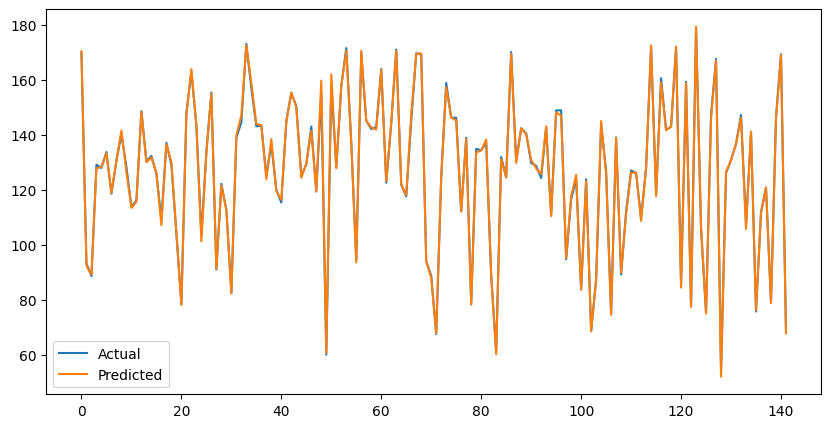

In [4]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
